In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
path = 'drive/MyDrive/Handwritting recognition/'
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
import torch
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
batch_size = 20

train_dir = path + 'train_lines'
test_dir = path + 'test_lines'
# VGG-16 takes 224x224 images as input, so we resize all of them
transforms = torchvision.transforms.Compose(
[
  transforms.Resize(224),
  transforms.RandomCrop(224),
  #transforms.RandomRotation(30),
  transforms.ToTensor(),  
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) 


train_dataset = datasets.ImageFolder(root=train_dir, transform=transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [5]:
print(train_loader.dataset)
print(test_loader.dataset)

Dataset ImageFolder
    Number of datapoints: 6201
    Root location: drive/MyDrive/Handwritting recognition/train_lines
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               RandomCrop(size=(224, 224), padding=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 1603
    Root location: drive/MyDrive/Handwritting recognition/test_lines
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               RandomCrop(size=(224, 224), padding=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [6]:
classes = test_dataset.classes
print(classes)

import numpy as np

def imshow(image):
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)

['Writer 1', 'Writer 10', 'Writer 100', 'Writer 11', 'Writer 12', 'Writer 13', 'Writer 14', 'Writer 15', 'Writer 16', 'Writer 17', 'Writer 18', 'Writer 19', 'Writer 2', 'Writer 20', 'Writer 21', 'Writer 22', 'Writer 23', 'Writer 24', 'Writer 25', 'Writer 26', 'Writer 27', 'Writer 28', 'Writer 29', 'Writer 3', 'Writer 30', 'Writer 31', 'Writer 32', 'Writer 33', 'Writer 34', 'Writer 35', 'Writer 36', 'Writer 37', 'Writer 38', 'Writer 39', 'Writer 4', 'Writer 40', 'Writer 41', 'Writer 42', 'Writer 43', 'Writer 44', 'Writer 45', 'Writer 46', 'Writer 47', 'Writer 48', 'Writer 49', 'Writer 5', 'Writer 50', 'Writer 51', 'Writer 52', 'Writer 53', 'Writer 54', 'Writer 55', 'Writer 56', 'Writer 57', 'Writer 58', 'Writer 59', 'Writer 6', 'Writer 60', 'Writer 61', 'Writer 62', 'Writer 63', 'Writer 64', 'Writer 65', 'Writer 66', 'Writer 67', 'Writer 68', 'Writer 69', 'Writer 7', 'Writer 70', 'Writer 71', 'Writer 72', 'Writer 73', 'Writer 74', 'Writer 75', 'Writer 76', 'Writer 77', 'Writer 78', 'Wri

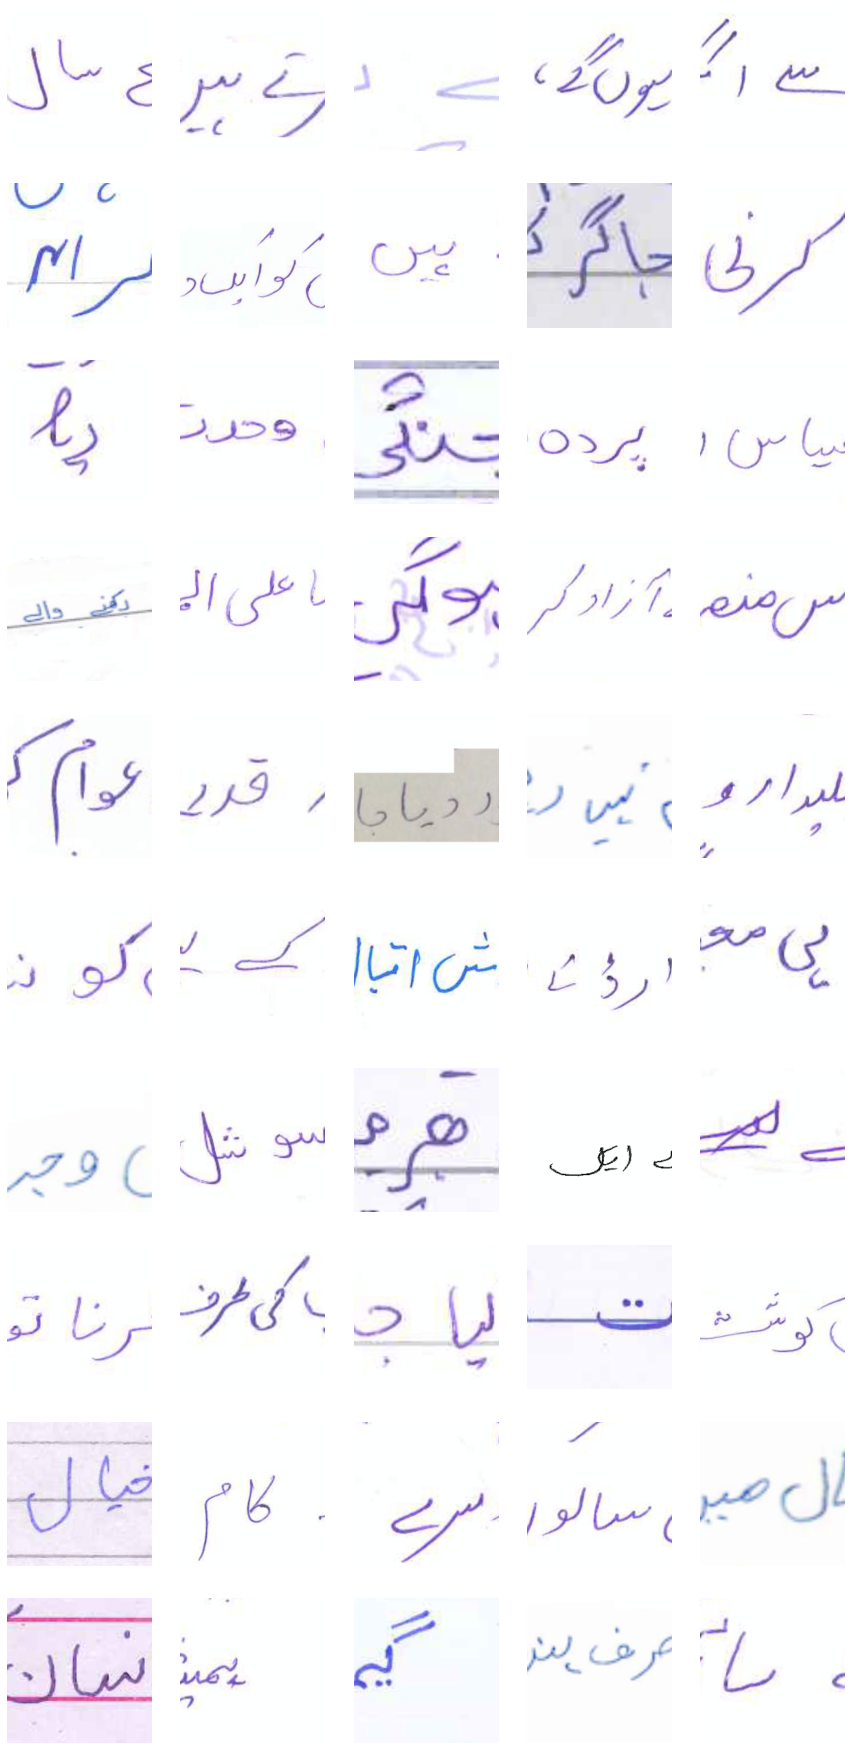

In [7]:
test_loader_plot = DataLoader(test_dataset, batch_size=50, shuffle=True)

def visualize_results():
    fig = plt.figure(figsize=(15, 32))
    for inputs, targets in test_loader_plot:
      inputs = inputs.to(device)
      targets = targets.to(device)

      for j in range(50):
          ax = plt.subplot(10, 5, j+1)
          ax.axis('off')
          imshow(inputs.cpu().data[j])
      break

visualize_results()

In [8]:
mode = 'DenseNet' #AlexNet, VGG16, GoogleNet, ResNet18, DenseNet
#print(torch.__version__)

In [9]:
# Load the pretrained model from pytorch
if mode == 'VGG16':
  vgg16 = models.vgg16(pretrained=True)
  # print out the model structure
  print(vgg16)
elif mode == 'AlexNet':
  alexNet = models.alexnet(pretrained=True)
  # print out the model structure
  print(alexNet)
elif mode == 'GoogleNet':
  googleNet = models.googlenet(pretrained=True)
  # print out the model structure
  print(googleNet)
elif mode == 'ResNet18':
  resNet = models.resnet18(pretrained=True)
  # print out the model structure
  print(resNet)
elif mode == 'DenseNet':
  denseNet = models.densenet161(pretrained=True)
  # print out the model structure
  print(denseNet)




Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth



DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (re

In [10]:
if mode == 'VGG16':
  print(vgg16.classifier[6].in_features) 
  print(vgg16.classifier[6].out_features)
elif mode == 'AlexNet':
  print(alexNet.classifier[6].in_features) 
  print(alexNet.classifier[6].out_features)
elif mode == 'GoogleNet':
  print(googleNet.fc.in_features) 
  print(googleNet.fc.out_features)
elif mode == 'ResNet18':
  print(resNet.fc.in_features) 
  print(resNet.fc.out_features)
elif mode == 'DenseNet':
  print(denseNet.classifier.in_features) 
  print(denseNet.classifier.out_features)



2208
1000


In [11]:
# Freeze training for all "features" layers
if mode == 'VGG16':
  for param in vgg16.features.parameters():
    param.requires_grad = False
elif mode == 'AlexNet':
  for param in alexNet.features.parameters():
    param.requires_grad = False
elif mode == 'GoogleNet':
  for param in googleNet.parameters():
    param.requires_grad = False
elif mode == 'ResNet18':
  for param in resNet.parameters():
    param.requires_grad = False
elif mode == 'DenseNet':
  for param in denseNet.features.parameters():
    param.requires_grad = False



In [12]:
import torch.nn as nn

if mode == 'VGG16':
  last_layer_inputs = vgg16.classifier[6].in_features
  last_layer = nn.Linear(last_layer_inputs, len(classes))
  vgg16.classifier[6] = last_layer

  # after completing your model, if GPU is available, move the model to GPU
  vgg16.to(device)

elif mode == 'AlexNet':
  last_layer_inputs = alexNet.classifier[6].in_features
  last_layer = nn.Linear(last_layer_inputs, len(classes))
  alexNet.classifier[6] = last_layer

  # after completing your model, if GPU is available, move the model to GPU
  alexNet.to(device)

elif mode == 'GoogleNet':
  last_layer_inputs = googleNet.fc.in_features
  last_layer = nn.Linear(last_layer_inputs, len(classes))
  googleNet.fc = last_layer

  # after completing your model, if GPU is available, move the model to GPU
  googleNet.to(device)

elif mode == 'ResNet18':
  last_layer_inputs = resNet.fc.in_features
  last_layer = nn.Linear(last_layer_inputs, len(classes))
  resNet.fc = last_layer

  # after completing your model, if GPU is available, move the model to GPU
  resNet.to(device)

elif mode == 'DenseNet':
  last_layer_inputs = denseNet.classifier.in_features
  last_layer = nn.Linear(last_layer_inputs, len(classes))
  denseNet.classifier = last_layer

  # after completing your model, if GPU is available, move the model to GPU
  denseNet.to(device)



In [13]:
if mode == 'VGG16':
  print(vgg16.classifier[6].in_features) 
  print(vgg16.classifier[6].out_features)
elif mode == 'AlexNet':
  print(alexNet.classifier[6].in_features) 
  print(alexNet.classifier[6].out_features)
elif mode == 'GoogleNet':
  print(googleNet.fc.in_features) 
  print(googleNet.fc.out_features)
elif mode == 'ResNet18':
  print(resNet.fc.in_features) 
  print(resNet.fc.out_features)
elif mode == 'DenseNet':
  print(denseNet.classifier.in_features) 
  print(denseNet.classifier.out_features)


2208
100


In [14]:
criterion = nn.CrossEntropyLoss()

if mode == 'VGG16':
  optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.001)
elif mode == 'AlexNet':
  optimizer = optim.RMSprop(alexNet.classifier.parameters(), lr=0.001)
elif mode == 'GoogleNet':
  optimizer = optim.SGD(googleNet.fc.parameters(), lr=0.001)
elif mode == 'ResNet18':
  optimizer = optim.RMSprop(resNet.fc.parameters(), lr=0.001)
elif mode == 'DenseNet':
  optimizer = optim.Adam(denseNet.classifier.parameters(), lr=0.001)



In [15]:
train_loss = []

def train(epochs):
  
  if mode == 'VGG16':
    vgg16.train()
  elif mode == 'AlexNet':
    alexNet.train()
  elif mode == 'GoogleNet':
    googleNet.train()
  elif mode == 'ResNet18':
    resNet.train()
  elif mode == 'DenseNet':
    denseNet.train()
    
  for epoch in range(epochs):
    running_loss = 0.
    n_samples = 0
      
    for idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device) 
      
        n_samples += inputs.size()[0]

        if mode == 'VGG16':
          outputs = vgg16(inputs)
        elif mode == 'AlexNet':
          outputs = alexNet(inputs)
        elif mode == 'GoogleNet':
          outputs = googleNet(inputs)
        elif mode == 'ResNet18':
          outputs = resNet(inputs)
        elif mode == 'DenseNet':
          outputs = denseNet(inputs)
          
        loss = criterion(outputs, targets)
        running_loss += loss.detach().item() / inputs.size()[0]
          
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()

    train_loss.append(running_loss / n_samples)      
    
    print("Epoch: {} | training loss: {} ".format(epoch + 1, train_loss[-1])) 

  return train_loss
    
train_loss = train(100)  

Epoch: 1 | training loss: 0.008978036721278306 
Epoch: 2 | training loss: 0.006010850175429385 
Epoch: 3 | training loss: 0.00509499319809672 
Epoch: 4 | training loss: 0.004726410723851392 
Epoch: 5 | training loss: 0.005073003344258231 
Epoch: 6 | training loss: 0.004282645132152943 
Epoch: 7 | training loss: 0.0039037730208982724 
Epoch: 8 | training loss: 0.00425677891917391 
Epoch: 9 | training loss: 0.004473059451535831 
Epoch: 10 | training loss: 0.004176925835234947 
Epoch: 11 | training loss: 0.003544963083811642 
Epoch: 12 | training loss: 0.003384475675038301 
Epoch: 13 | training loss: 0.004214956199396157 
Epoch: 14 | training loss: 0.0031437540605575337 
Epoch: 15 | training loss: 0.003764914007672108 
Epoch: 16 | training loss: 0.003348787140700151 
Epoch: 17 | training loss: 0.003392624818996121 
Epoch: 18 | training loss: 0.0042102702771813745 
Epoch: 19 | training loss: 0.003746941527797799 
Epoch: 20 | training loss: 0.0029962406163157184 
Epoch: 21 | training loss: 

In [16]:
import numpy as np

test_loss = 0
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))

if mode == 'VGG16':
  vgg16.eval()
elif mode == 'AlexNet':
  alexNet.eval()
elif mode == 'GoogleNet':
  googleNet.eval()
elif mode == 'ResNet18':
  resNet.eval()
elif mode == 'DenseNet':
  denseNet.eval()

total = 0
correct = 0
with torch.no_grad():
    for data in train_loader:
        inputs, targets= data
        inputs = inputs.to(device)
        targets = targets.to(device)

        if mode == 'VGG16':
          outputs = vgg16(inputs)
        elif mode == 'AlexNet':
          outputs = alexNet(inputs)
        elif mode == 'GoogleNet':
          outputs = googleNet(inputs)
        elif mode == 'ResNet18':
          outputs = resNet(inputs)
        elif mode == 'DenseNet':
          outputs = denseNet(inputs)

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item() 
        total += inputs.size()[0] 
        
print("Accuracy on training data: ", round(correct/total, 2)*100)

total = 0
correct = 0
with torch.no_grad():
    for data in test_loader:
        inputs, targets= data
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        if mode == 'VGG16':
          outputs = vgg16(inputs)
        elif mode == 'AlexNet':
          outputs = alexNet(inputs)
        elif mode == 'GoogleNet':
          outputs = googleNet(inputs)
        elif mode == 'ResNet18':
          outputs = resNet(inputs)
        elif mode == 'DenseNet':
          outputs = denseNet(inputs)

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item() 
        total += inputs.size()[0] 
        
print("Accuracy on testing data: ", round(correct/total, 2)*100)



Accuracy on training data:  78.0
Accuracy on testing data:  72.0


Accuracy on testing data:  70.0


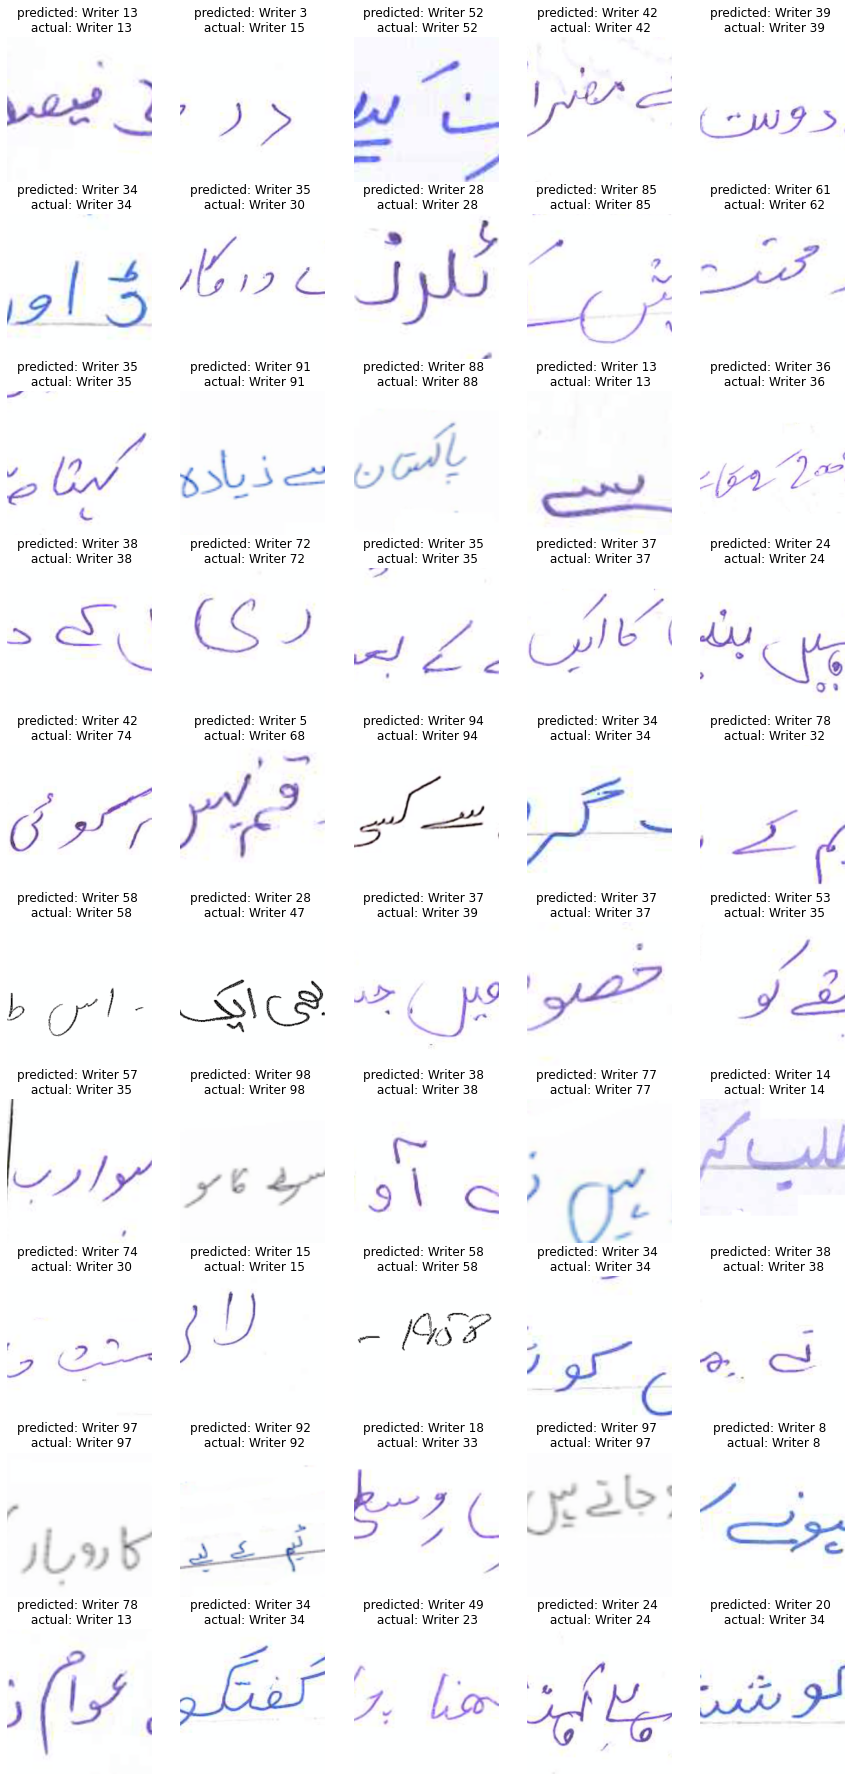

In [17]:
total = 0
correct = 0
fig = plt.figure(figsize=(15, 32))
class_names = test_dataset.classes
with torch.no_grad():
    for data in test_loader_plot:
        inputs, targets= data
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        if mode == 'VGG16':
          outputs = vgg16(inputs)
        elif mode == 'AlexNet':
          outputs = alexNet(inputs)
        elif mode == 'GoogleNet':
          outputs = googleNet(inputs)
        elif mode == 'ResNet18':
          outputs = resNet(inputs)
        elif mode == 'DenseNet':
          outputs = denseNet(inputs)

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item() 
        total += inputs.size()[0] 

        for j in range(50):
          ax = plt.subplot(10, 5, j+1)
          ax.axis('off')       
          ax.set_title('predicted: {} \n actual: {}'.format(class_names[predicted[j]], class_names[targets[j]]))
          imshow(inputs.cpu().data[j])

        break
        
print("Accuracy on testing data: ", round(correct/total, 2)*100)